# Lending Club Case Study

This case study anaylyses the risks with the help of data visualisation . This will enable you to understand how visualisation aids you in solving business problems.

**Problem Statement**


Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

-Aim of this case study is Identify the risky loan applicants using Exploratoary Data Analysis, then such loans can be reduced thereby cutting down the amount of credit loss. 

-Lending Club wants to understand the driving factors behind loan default and identify the variables which are strong indicators of default. 

In [93]:
#Load the libraries
import pandas as pd  #To work with the dataset
import numpy as np  #Math Library
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
#importing the data 
df_loans=pd.read_csv("loan.csv", index_col=0)

C:\Users\e.muthuraj\AppData\Local\Temp\ipykernel_45232\4045416566.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loans=pd.read_csv("loan.csv", index_col=0)


In [95]:
#Looking at the data 
df_loans.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                        
1077501    1296599       5000         5000           4975.0   36 months   
1077430    1314167       2500         2500           2500.0   60 months   
1077175    1313524       2400         2400           2400.0   36 months   
1076863    1277178      10000        10000          10000.0   36 months   
1075358    1311748       3000         3000           3000.0   60 months   

        int_rate  installment grade sub_grade                 emp_title  ...  \
id                                                                       ...   
1077501   10.65%       162.87     B        B2                       NaN  ...   
1077430   15.27%        59.83     C        C4                     Ryder  ...   
1077175   15.96%        84.33     C        C5                       NaN  ...   
1076863   13.49%       339.31     C        C1       AIR RESOURCES BOARD  ...   
1075358   12.69%        67.79     B        B5  University Medical Group  ...   

        num_tl_90g_dpd_24m num_tl_op_past_12m  pct_tl_nvr_dlq  \
id                                                              
1077501                NaN                NaN             NaN   
1077430                NaN                NaN             NaN   
1077175                NaN                NaN             NaN   
1076863                NaN                NaN             NaN   
1075358                NaN                NaN             NaN   

        percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
id                                                                        
1077501              NaN                  0.0       0.0             NaN   
1077430              NaN                  0.0       0.0             NaN   
1077175              NaN                  0.0       0.0             NaN   
1076863              NaN                  0.0       0.0             NaN   
1075358              NaN                  0.0       0.0             NaN   

        total_bal_ex_mort total_bc_limit total_il_high_credit_limit  
id                                                                   
1077501               NaN            NaN                        NaN  
1077430               NaN            NaN                        NaN  
1077175               NaN            NaN                        NaN  
1076863               NaN            NaN                        NaN  
1075358               NaN            NaN                        NaN  

[5 rows x 110 columns]

In [96]:
#Check the datatypes of all the columns of the dataframe
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB


In [97]:
#Check the number of null values in the columns
df_loans.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

In [98]:
# Creating a dataframe to display percentage of null values in each column
Nframe = pd.DataFrame()
Nframe['Null Percentage']=['10% or less','20% or less','30% or less','40% or less','50% or less','60% or less','70% or less']

ten_p = len(df_loans.columns[((df_loans.isnull().sum())/len(df_loans)) < 0.1])
twenty_p = len(df_loans.columns[((df_loans.isnull().sum())/len(df_loans)) < 0.2])
thirty_p = len(df_loans.columns[((df_loans.isnull().sum())/len(df_loans)) < 0.3])
fourty_p = len(df_loans.columns[((df_loans.isnull().sum())/len(df_loans)) < 0.4])
fifty_p = len(df_loans.columns[((df_loans.isnull().sum())/len(df_loans)) < 0.5])
sixty_p = len(df_loans.columns[((df_loans.isnull().sum())/len(df_loans)) < 0.6])
seventy_p = len(df_loans.columns[((df_loans.isnull().sum())/len(df_loans)) < 0.7])


Nframe['Number of cols'] = [ten_p,twenty_p,thirty_p,fourty_p,fifty_p,sixty_p,seventy_p]
Nframe

Null Percentage  Number of cols
0     10% or less              52
1     20% or less              52
2     30% or less              52
3     40% or less              53
4     50% or less              53
5     60% or less              53
6     70% or less              54

In [99]:
# Data cleaning, to remove the coulmns which are having only null value ,especially from column number 54 to column number 105
# Dropping the identified null value columns

df_loans.drop(df_loans.iloc[:, 54:105], inplace = True, axis = 1) 

In [100]:
df_loans.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                        
1077501    1296599       5000         5000           4975.0   36 months   
1077430    1314167       2500         2500           2500.0   60 months   
1077175    1313524       2400         2400           2400.0   36 months   
1076863    1277178      10000        10000          10000.0   36 months   
1075358    1311748       3000         3000           3000.0   60 months   

        int_rate  installment grade sub_grade                 emp_title  ...  \
id                                                                       ...   
1077501   10.65%       162.87     B        B2                       NaN  ...   
1077430   15.27%        59.83     C        C4                     Ryder  ...   
1077175   15.96%        84.33     C        C5                       NaN  ...   
1076863   13.49%       339.31     C        C1       AIR RESOURCES BOARD  ...   
1075358   12.69%        67.79     B        B5  University Medical Group  ...   

        mths_since_last_major_derog policy_code  application_type  \
id                                                                  
1077501                         NaN           1        INDIVIDUAL   
1077430                         NaN           1        INDIVIDUAL   
1077175                         NaN           1        INDIVIDUAL   
1076863                         NaN           1        INDIVIDUAL   
1075358                         NaN           1        INDIVIDUAL   

        annual_inc_joint dti_joint tax_liens tot_hi_cred_lim  \
id                                                             
1077501              NaN       NaN       0.0             NaN   
1077430              NaN       NaN       0.0             NaN   
1077175              NaN       NaN       0.0             NaN   
1076863              NaN       NaN       0.0             NaN   
1075358              NaN       NaN       0.0             NaN   

        total_bal_ex_mort total_bc_limit total_il_high_credit_limit  
id                                                                   
1077501               NaN            NaN                        NaN  
1077430               NaN            NaN                        NaN  
1077175               NaN            NaN                        NaN  
1076863               NaN            NaN                        NaN  
1075358               NaN            NaN                        NaN  

[5 rows x 59 columns]

In [101]:
#Check the number of null values in the columns
df_loans.isnull().sum()

member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       2459
emp_length                      1075
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
desc                           12940
purpose                            0
title                             11
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
m

In [102]:
#again look at the few more columns still have mostly null values i.e tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
to_be_dropped = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim","mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit","annual_inc_joint","dti_joint"]
df_loans.drop(labels = to_be_dropped, axis =1, inplace=True)

In [103]:
#Check the number of null values in the columns
df_loans.isnull().sum()

member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal           

In [104]:
#Check the number of null values in the columns
df_loans.isnull().sum()

member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal           

In [105]:
#Drop the member_id unique column and url
to_be_dropped_2 = ["member_id","url"]
df_loans.drop(labels = to_be_dropped_2, axis =1, inplace=True)

In [106]:
#mostly only important columns
df_loans.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
id                                                                      
1077501       5000         5000           4975.0   36 months   10.65%   
1077430       2500         2500           2500.0   60 months   15.27%   
1077175       2400         2400           2400.0   36 months   15.96%   
1076863      10000        10000          10000.0   36 months   13.49%   
1075358       3000         3000           3000.0   60 months   12.69%   

         installment grade sub_grade                 emp_title emp_length  \
id                                                                          
1077501       162.87     B        B2                       NaN  10+ years   
1077430        59.83     C        C4                     Ryder   < 1 year   
1077175        84.33     C        C5                       NaN  10+ years   
1076863       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
1075358        67.79     B        B5  University Medical Group     1 year   

         ... total_rec_late_fee  recoveries collection_recovery_fee  \
id       ...                                                          
1077501  ...               0.00        0.00                    0.00   
1077430  ...               0.00      117.08                    1.11   
1077175  ...               0.00        0.00                    0.00   
1076863  ...              16.97        0.00                    0.00   
1075358  ...               0.00        0.00                    0.00   

        last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
id                                                        
1077501       Jan-15          171.62             May-16   
1077430       Apr-13          119.66             Sep-13   
1077175       Jun-14          649.91             May-16   
1076863       Jan-15          357.48             Apr-16   
1075358       May-16           67.79             May-16   

        collections_12_mths_ex_med policy_code application_type tax_liens  
id                                                                         
1077501                        0.0           1       INDIVIDUAL       0.0  
1077430                        0.0           1       INDIVIDUAL       0.0  
1077175                        0.0           1       INDIVIDUAL       0.0  
1076863                        0.0           1       INDIVIDUAL       0.0  
1075358                        0.0           1       INDIVIDUAL       0.0  

[5 rows x 46 columns]

In [107]:
# % to be stripped from intrest rate column and convert emp_length column to have only digit values
df_loans['int_rate'] = df_loans['int_rate'].str.rstrip('%')

df_loans['emp_length'] = df_loans['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))

In [108]:
# convert 'loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt' columns into numeric data for considering to calculations

amnt_columns = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
df_loans[amnt_columns] = df_loans[amnt_columns].apply(pd.to_numeric)



In [113]:
# Date and year columns of loan issued year

df_loans.issue_d = pd.to_datetime(df_loans.issue_d, format='%b-%y')
df_loans['issueyear']=df_loans['issue_d'].dt.year
df_loans['issuemonth']=df_loans['issue_d'].dt.month

<Axes: xlabel='issueyear', ylabel='count'>

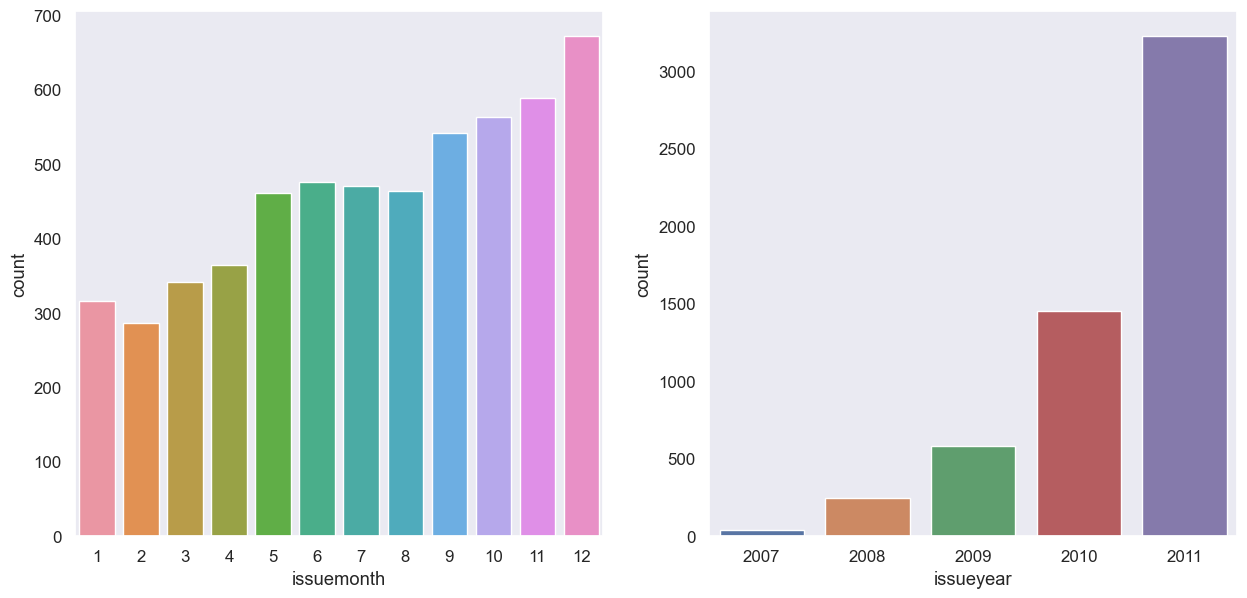

In [209]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issuemonth', data=df_loans[df_loans['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issueyear', data=df_loans[df_loans['loan_status']=='Charged Off'])

In [109]:

to_be_converted_to_string = ["grade","sub_grade","loan_status","verification_status","purpose","title","addr_state","pymnt_plan","initial_list_status","application_type"]
df_loans[to_be_converted_to_string]=df_loans[to_be_converted_to_string].astype(str)

df_loans.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal   

In [110]:
#mostly cleaned data
df_loans.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
id                                                                       
1077501       5000         5000           4975.0   36 months     10.65   
1077430       2500         2500           2500.0   60 months     15.27   
1077175       2400         2400           2400.0   36 months     15.96   
1076863      10000        10000          10000.0   36 months     13.49   
1075358       3000         3000           3000.0   60 months     12.69   

         installment grade sub_grade                 emp_title  emp_length  \
id                                                                           
1077501       162.87     B        B2                       NaN        10.0   
1077430        59.83     C        C4                     Ryder         1.0   
1077175        84.33     C        C5                       NaN        10.0   
1076863       339.31     C        C1       AIR RESOURCES BOARD        10.0   
1075358        67.79     B        B5  University Medical Group         1.0   

         ... total_rec_late_fee  recoveries collection_recovery_fee  \
id       ...                                                          
1077501  ...               0.00        0.00                    0.00   
1077430  ...               0.00      117.08                    1.11   
1077175  ...               0.00        0.00                    0.00   
1076863  ...              16.97        0.00                    0.00   
1075358  ...               0.00        0.00                    0.00   

        last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
id                                                        
1077501       Jan-15          171.62             May-16   
1077430       Apr-13          119.66             Sep-13   
1077175       Jun-14          649.91             May-16   
1076863       Jan-15          357.48             Apr-16   
1075358       May-16           67.79             May-16   

        collections_12_mths_ex_med policy_code application_type tax_liens  
id                                                                         
1077501                        0.0           1       INDIVIDUAL       0.0  
1077430                        0.0           1       INDIVIDUAL       0.0  
1077175                        0.0           1       INDIVIDUAL       0.0  
1076863                        0.0           1       INDIVIDUAL       0.0  
1075358                        0.0           1       INDIVIDUAL       0.0  

[5 rows x 46 columns]

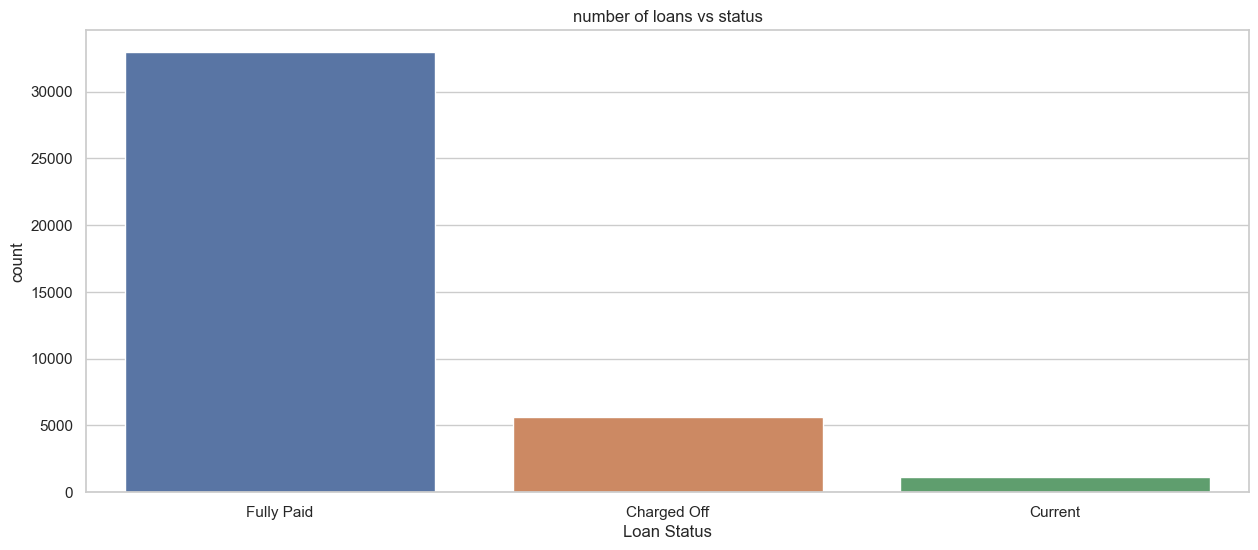

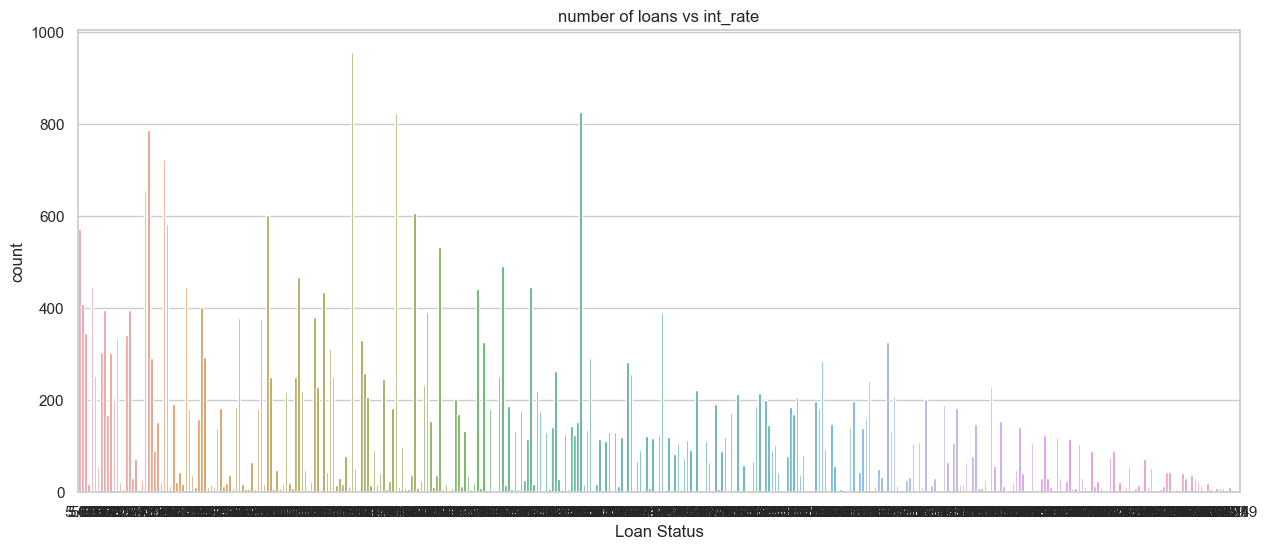

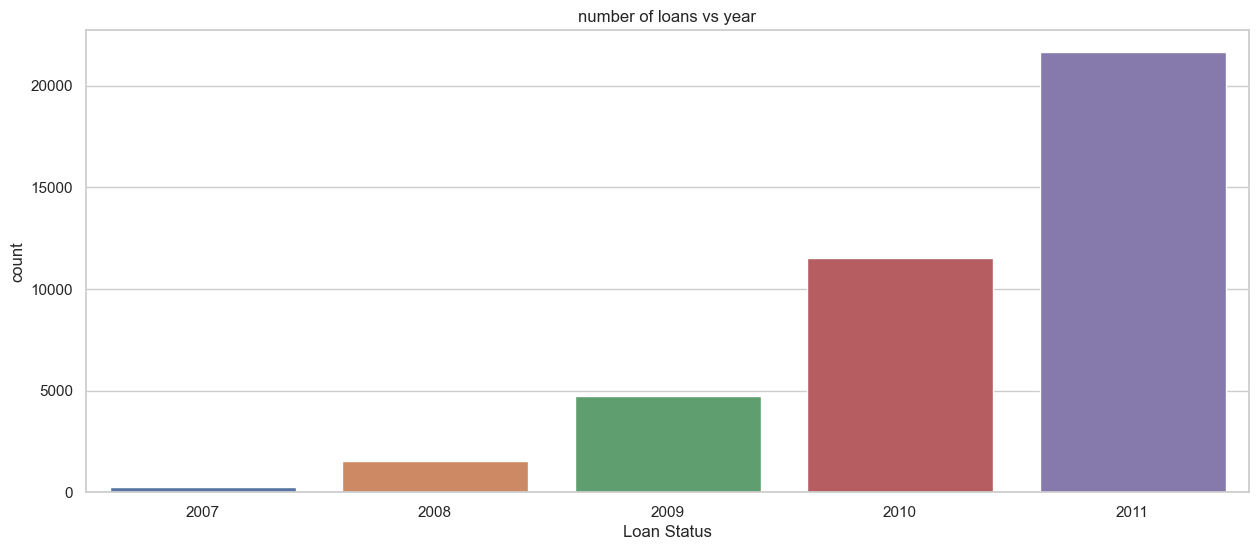

In [119]:
# Looking at loan_status vs int_rate vs issued year by plotting 


sns.set(style="whitegrid")
#ax = sns.countplot(x="loan_status", data=loans)
def getloanstatus(x_var,df_loans,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(df_loans)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=df_loans)
    plt.title(title)
    plt.xlabel(x_label)       
getloanstatus("loan_status",df_loans,'Loan Status','number of loans vs status')
getloanstatus("int_rate",df_loans,'Loan Status','number of loans vs int_rate')
getloanstatus("issueyear",df_loans,'Loan Status','number of loans vs year')

# Univariate Analysis

In [126]:
df_loans['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

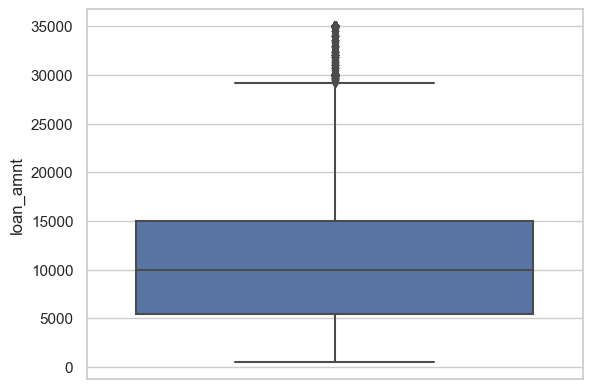

In [129]:
# Create the boxplot
sns.boxplot(data=df_loans, y='loan_amnt')

# Display the plot
plt.show()

In [164]:
print('Remove Outliers for annual_inc :\n')
print(df_loans['annual_inc'].describe())


Remove Outliers for annual_inc :

count     38924.000000
mean      64096.802806
std       32378.165267
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80000.000000
max      188004.000000
Name: annual_inc, dtype: float64


In [163]:

df_loans = df_loans[df_loans["annual_inc"] < df_loans["annual_inc"].quantile(0.99)]

print('post outliers deletion :')
print(df_loans["annual_inc"].describe())


post outliers deletion :
count     38924.000000
mean      64096.802806
std       32378.165267
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80000.000000
max      188004.000000
Name: annual_inc, dtype: float64


In [165]:

df_loans['int_rate'].describe()

count    38924.000000
mean        11.997265
std          3.714175
min          5.420000
25%          9.070000
50%         11.830000
75%         14.540000
max         24.400000
Name: int_rate, dtype: float64

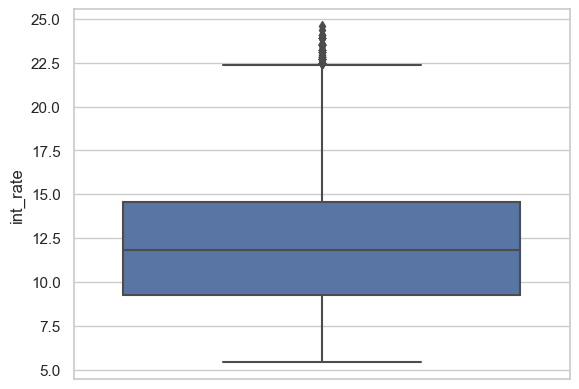

In [136]:
sns.boxplot(data=df_loans, y='int_rate')
# Display the plot
plt.show()

In [190]:
# Derived columns
# categories of loan amounts into groups for bivariate analysis.
df_loans['loan_amnt_grp'] = pd.cut(df_loans['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7k', '7k-14k', '14k-21k', '21k-28k', '28k +'])

# categories of annual incomes into  groups for   bivariate analysis.
df_loans['annual_inc_grp'] = pd.cut(df_loans['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categories of intrest rates into groups for bivariate analysis.
df_loans['int_rate_grp'] = pd.cut(df_loans['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])


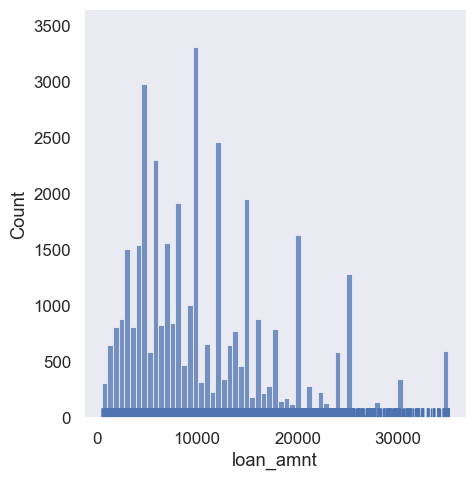

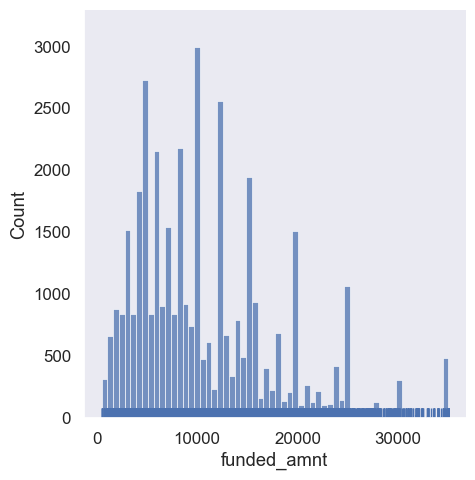

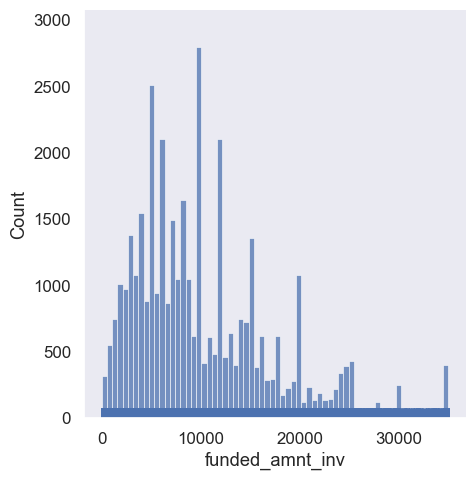

In [191]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

ax = sns.displot(df_loans['loan_amnt'],rug = True)

ax = sns.displot(df_loans['funded_amnt'],rug = True)

ax = sns.displot(df_loans['funded_amnt_inv'],rug = True)
plt.show()

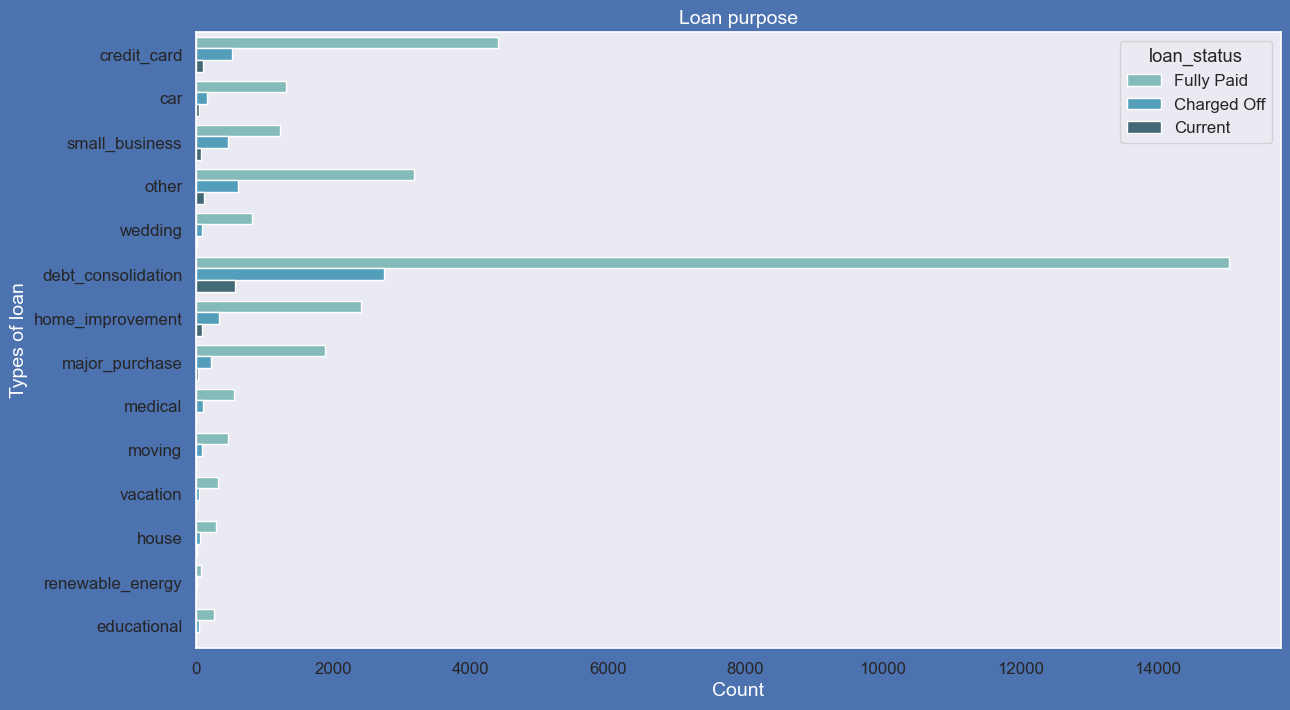

In [192]:
# Univariate Analysis for Purpose Of Loan vs charged off

plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df_loans,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan purpose',fontsize=14,color='w')
ax.set_ylabel('Types of loan',fontsize=14,color = 'w')
ax.set_xlabel('Count',fontsize=14,color = 'w')      
plt.show()

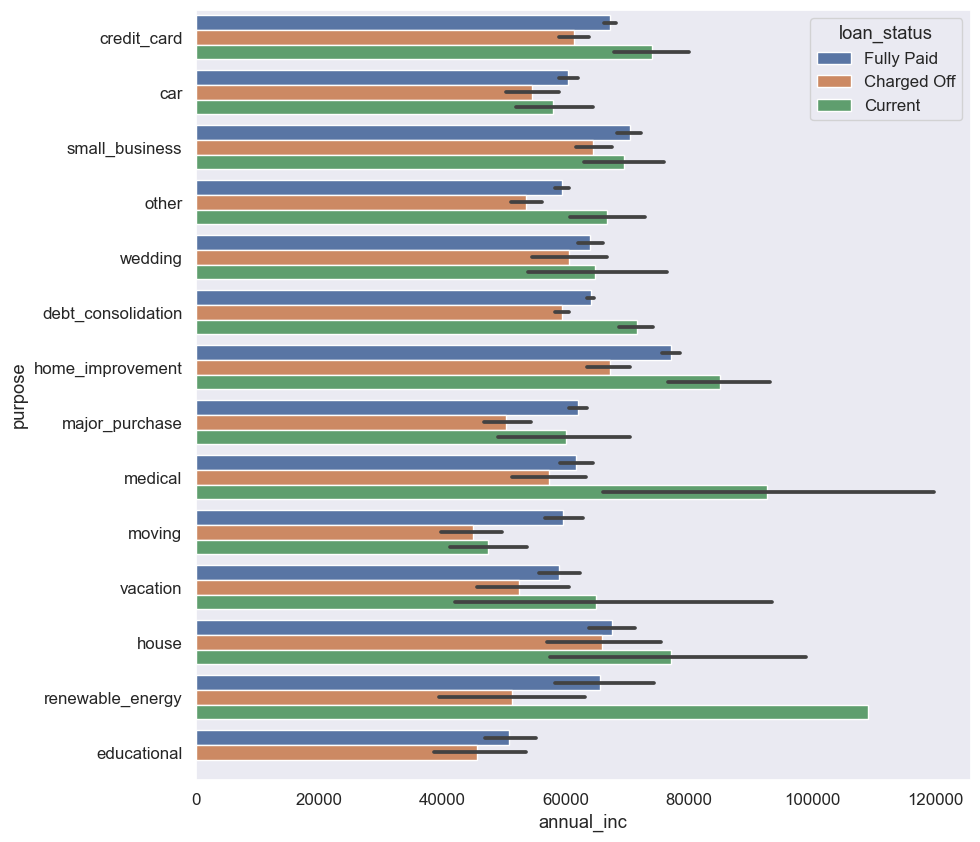

In [205]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_loans,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

In [193]:
# Bivariate Analysis of annual income versus default rate -

ai_vs_loanamt = df_loans.groupby(['annual_inc_grp', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ai_vs_loanamt['Total'] = ai_vs_loanamt['Charged Off'] + ai_vs_loanamt['Current'] + ai_vs_loanamt['Fully Paid'] 
ai_vs_loanamt['Charged_off_ratio'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
ai_vs_loanamt.sort_values('Charged_off_ratio', ascending=False)

loan_status annual_inc_grp  Charged Off  Current  Fully Paid  Total  \
0                  0-20000          237        9         943   1189   
1              20000-40000         1514      170        7004   8688   
2              40000-60000         1729      345        9534  11608   
3              60000-80000         1024      240        6597   7861   
4                  80000 +         1045      352        8181   9578   

loan_status  Charged_off_ratio  
0                     0.199327  
1                     0.174263  
2                     0.148949  
3                     0.130263  
4                     0.108292

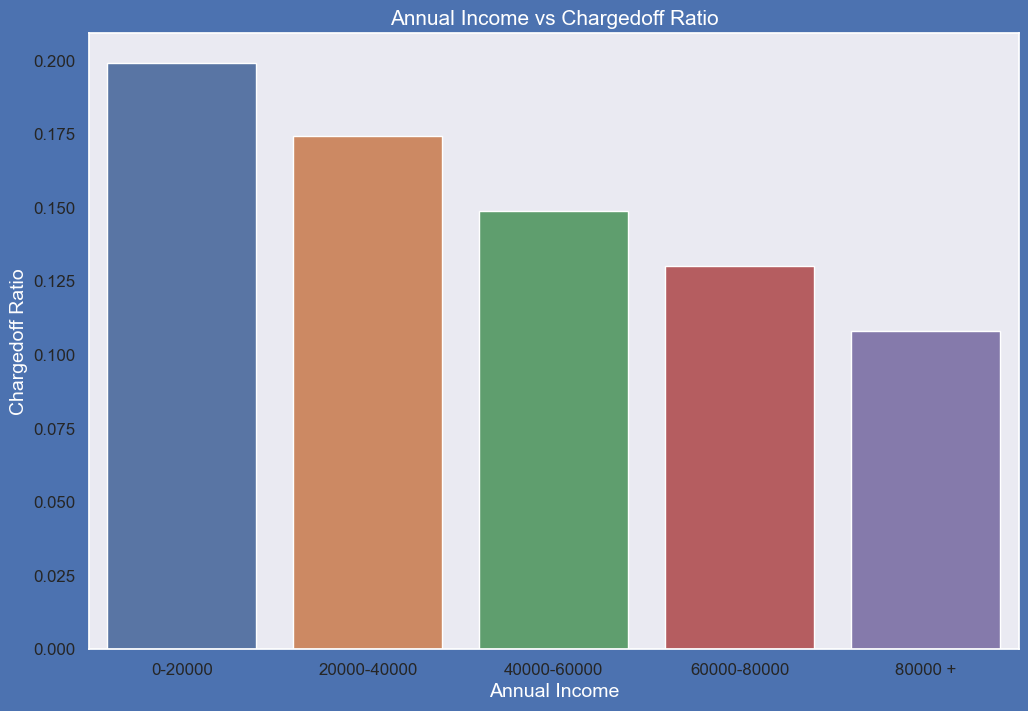

In [194]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Ratio',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_grp', y='Charged_off_ratio', data=ai_vs_loanamt)
ax1.set_ylabel('Chargedoff Ratio',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

In [200]:
# Bivariate Analysis of purpose of Loan versus Chargedoff_Ratio.

purpose_vs_loan = df_loans.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Ratio'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)


loan_status             purpose  Charged Off  Current  Fully Paid    Total  \
11               small_business        469.0     73.0      1229.0   1771.0   
10             renewable_energy         18.0      1.0        79.0     98.0   
3                   educational         54.0      0.0       265.0    319.0   
7                       medical        106.0     10.0       555.0    671.0   
9                         other        617.0    124.0      3173.0   3914.0   
8                        moving         90.0      7.0       476.0    573.0   
5                         house         57.0     14.0       296.0    367.0   
2            debt_consolidation       2743.0    577.0     15036.0  18356.0   
12                     vacation         53.0      6.0       319.0    378.0   
4              home_improvement        335.0     95.0      2405.0   2835.0   
1                   credit_card        534.0    102.0      4405.0   5041.0   
0                           car        160.0     50.0      1319.0   1529.0   
6                major_purchase        219.0     37.0      1887.0   2143.0   
13                      wedding         94.0     20.0       815.0    929.0   

loan_status  Chargedoff_Ratio  
11                   0.264822  
10                   0.183673  
3                    0.169279  
7                    0.157973  
9                    0.157639  
8                    0.157068  
5                    0.155313  
2                    0.149433  
12                   0.140212  
4                    0.118166  
1                    0.105931  
0                    0.104644  
6                    0.102193  
13                   0.101184

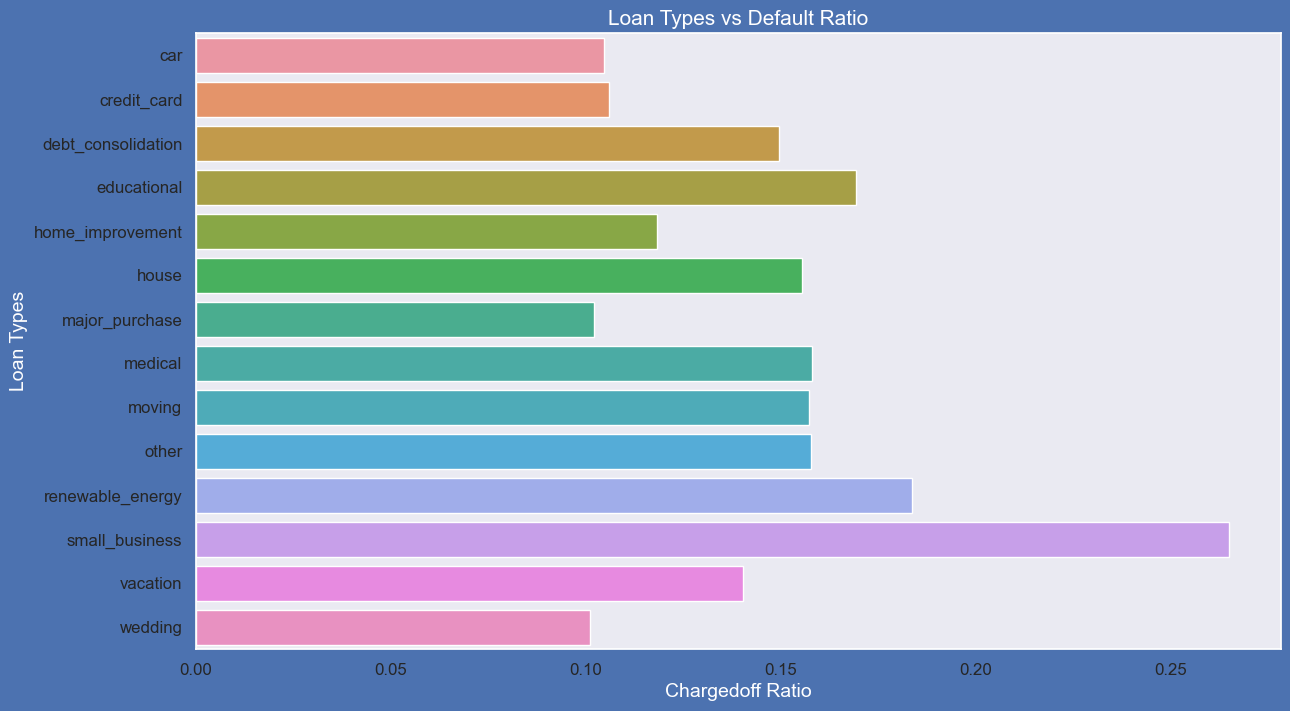

In [202]:
# Bar to see the pattern to observe the data and understand

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Loan Types vs Default Ratio',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Ratio', data=purpose_vs_loan)
ax1.set_ylabel('Loan Types',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Ratio',fontsize=14,color = 'w')
plt.show()



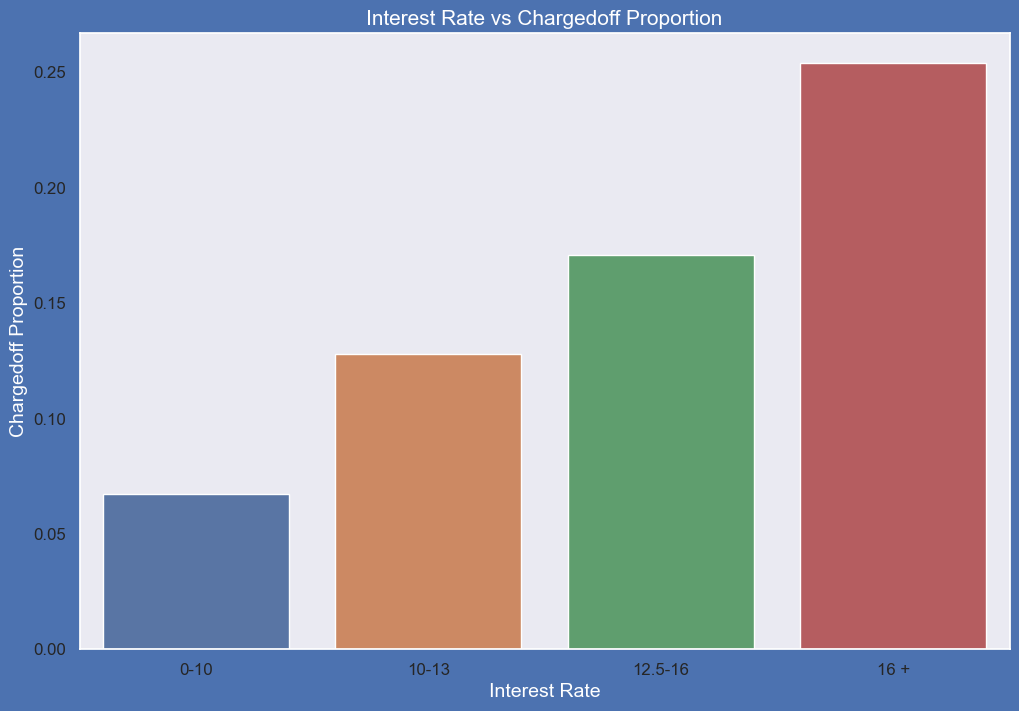

In [162]:
# Bar chart to see the pattern to understand data .

interest_vs_loan = df_loans.groupby(['int_rate_grp', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_grp', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()



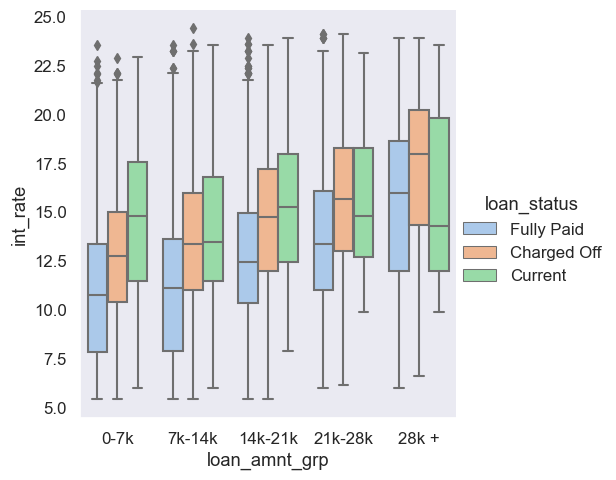

In [183]:
# income rage vs  interest rate to along with status
sns.catplot(data =df_loans,y ='int_rate', x ='loan_amnt_grp', hue ='loan_status',palette="pastel",kind = 'box')


<Axes: xlabel='int_rate', ylabel='grade'>

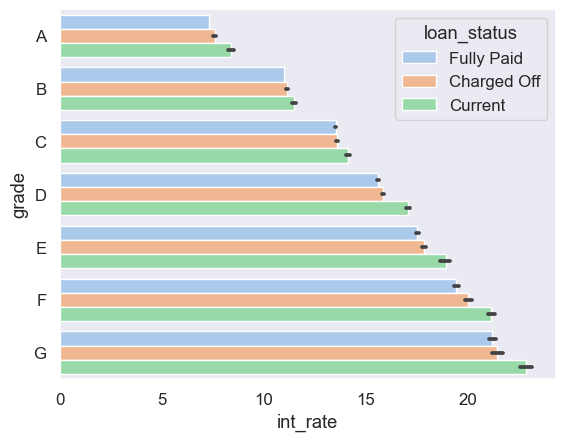

In [170]:
#interest rate vs grade vs status 
sns.barplot(data =df_loans,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
#interest rate vs grade vs status 

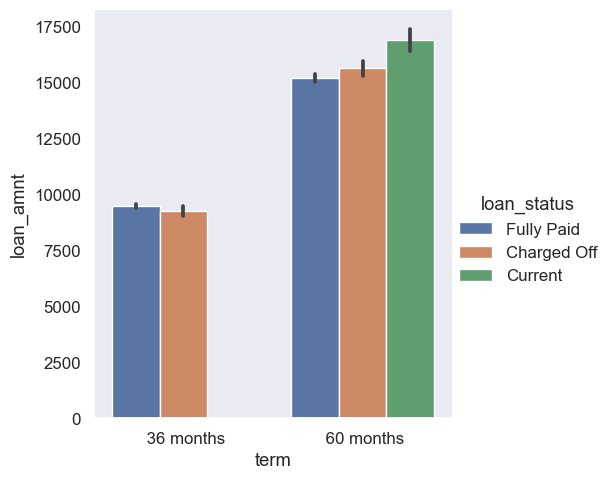

In [198]:
# term vs loan amount vs loan status
sns.catplot(x = 'term', y = 'loan_amnt', data = df_loans,hue = 'loan_status', kind = 'bar')


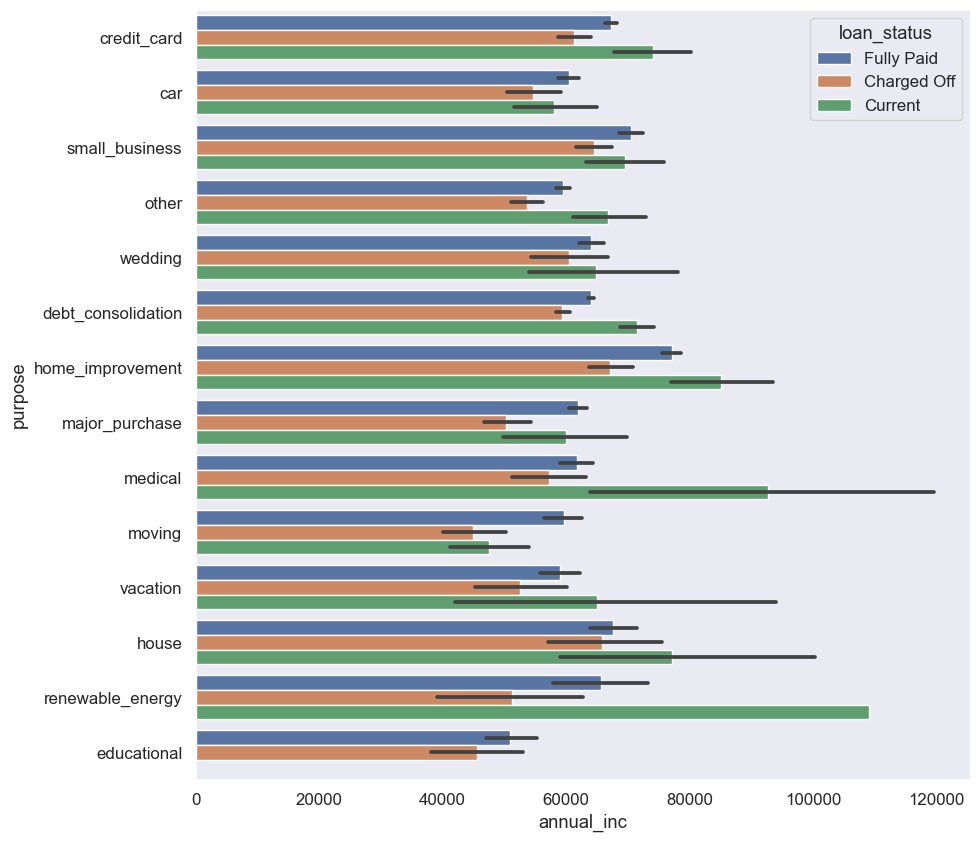

In [206]:
# income vs  purpose to along with status
plt.figure(figsize=(10,10))
sns.barplot(data =df_loans,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()